# Kaggle Installation

In [1]:
# install kaggle
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"milhamfachlevi","key":"b7c866182fbd6d70be22a6aff25d66b1"}'}

In [3]:
# create a kaggle folder
!mkdir ~/.kaggle

In [4]:
# copy the kaggle.json to folder created  
!cp kaggle.json ~/.kaggle/

In [5]:
# permisson for the json to act
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
# to list all avalaible datasets in kaggle
!kaggle datasets list

ref                                                             title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meirnizri/covid19-dataset                                       COVID-19 Dataset                                      5MB  2022-11-13 15:47:17           6362        191  1.0              
madhurpant/world-deaths-and-causes-1990-2019                    World Deaths and Causes (1990 - 2019)               442KB  2022-11-29 07:09:27           1132         30  1.0              
thedevastator/jobs-dataset-from-glassdoor                       Salary Prediction                                     3MB  2022-11-16 13:52:31           4229         99  1.0              
thedevastator/how-much-sleep-do-americans-really-get        

In [7]:
!kaggle datasets download -d madisona/translated-animals10

100% 584M/586M [00:17<00:00, 39.4MB/s]
100% 586M/586M [00:17<00:00, 35.6MB/s]


In [8]:
# unzip
!mkdir animal
!unzip -qq translated-animals10.zip -d animal
!ls animal

animals10


# Import Library

In [9]:
import os
import pandas as pd
import shutil
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [10]:
animal = os.path.join('/content/animal/animals10/raw-img')
print(os.listdir(animal))

['dog', 'butterfly', 'cow', 'squirrel', 'elephant', 'cat', 'horse', 'spider', 'chicken', 'sheep']


In [11]:
unused_animal = ['spider', 'elephant', 'squirrel', 'cow', 'dog', 'sheep' ]

for x in unused_animal:
  path = os.path.join(animal, x)
  shutil.rmtree(path)

In [12]:
list_animal = os.listdir(animal)
print(list_animal)

['butterfly', 'cat', 'horse', 'chicken']


In [13]:
from PIL import Image
total = 0

for x in list_animal:
  dir = os.path.join(animal, x)
  y = len(os.listdir(dir))
  print(x+':', y)
  total = total + y
  
  img_name = os.listdir(dir)
  for z in range(4):
    img_path = os.path.join(dir, img_name[z])
    img = Image.open(img_path)
    print('-',img.size)
  print('---------------')

print('\nTotal :', total)

butterfly: 2112
- (640, 457)
- (300, 188)
- (300, 300)
- (426, 640)
---------------
cat: 1668
- (640, 478)
- (300, 300)
- (300, 196)
- (640, 616)
---------------
horse: 2623
- (300, 188)
- (282, 300)
- (300, 231)
- (300, 233)
---------------
chicken: 3098
- (300, 204)
- (300, 249)
- (300, 300)
- (278, 300)
---------------

Total : 9501


<function matplotlib.pyplot.show(*args, **kw)>

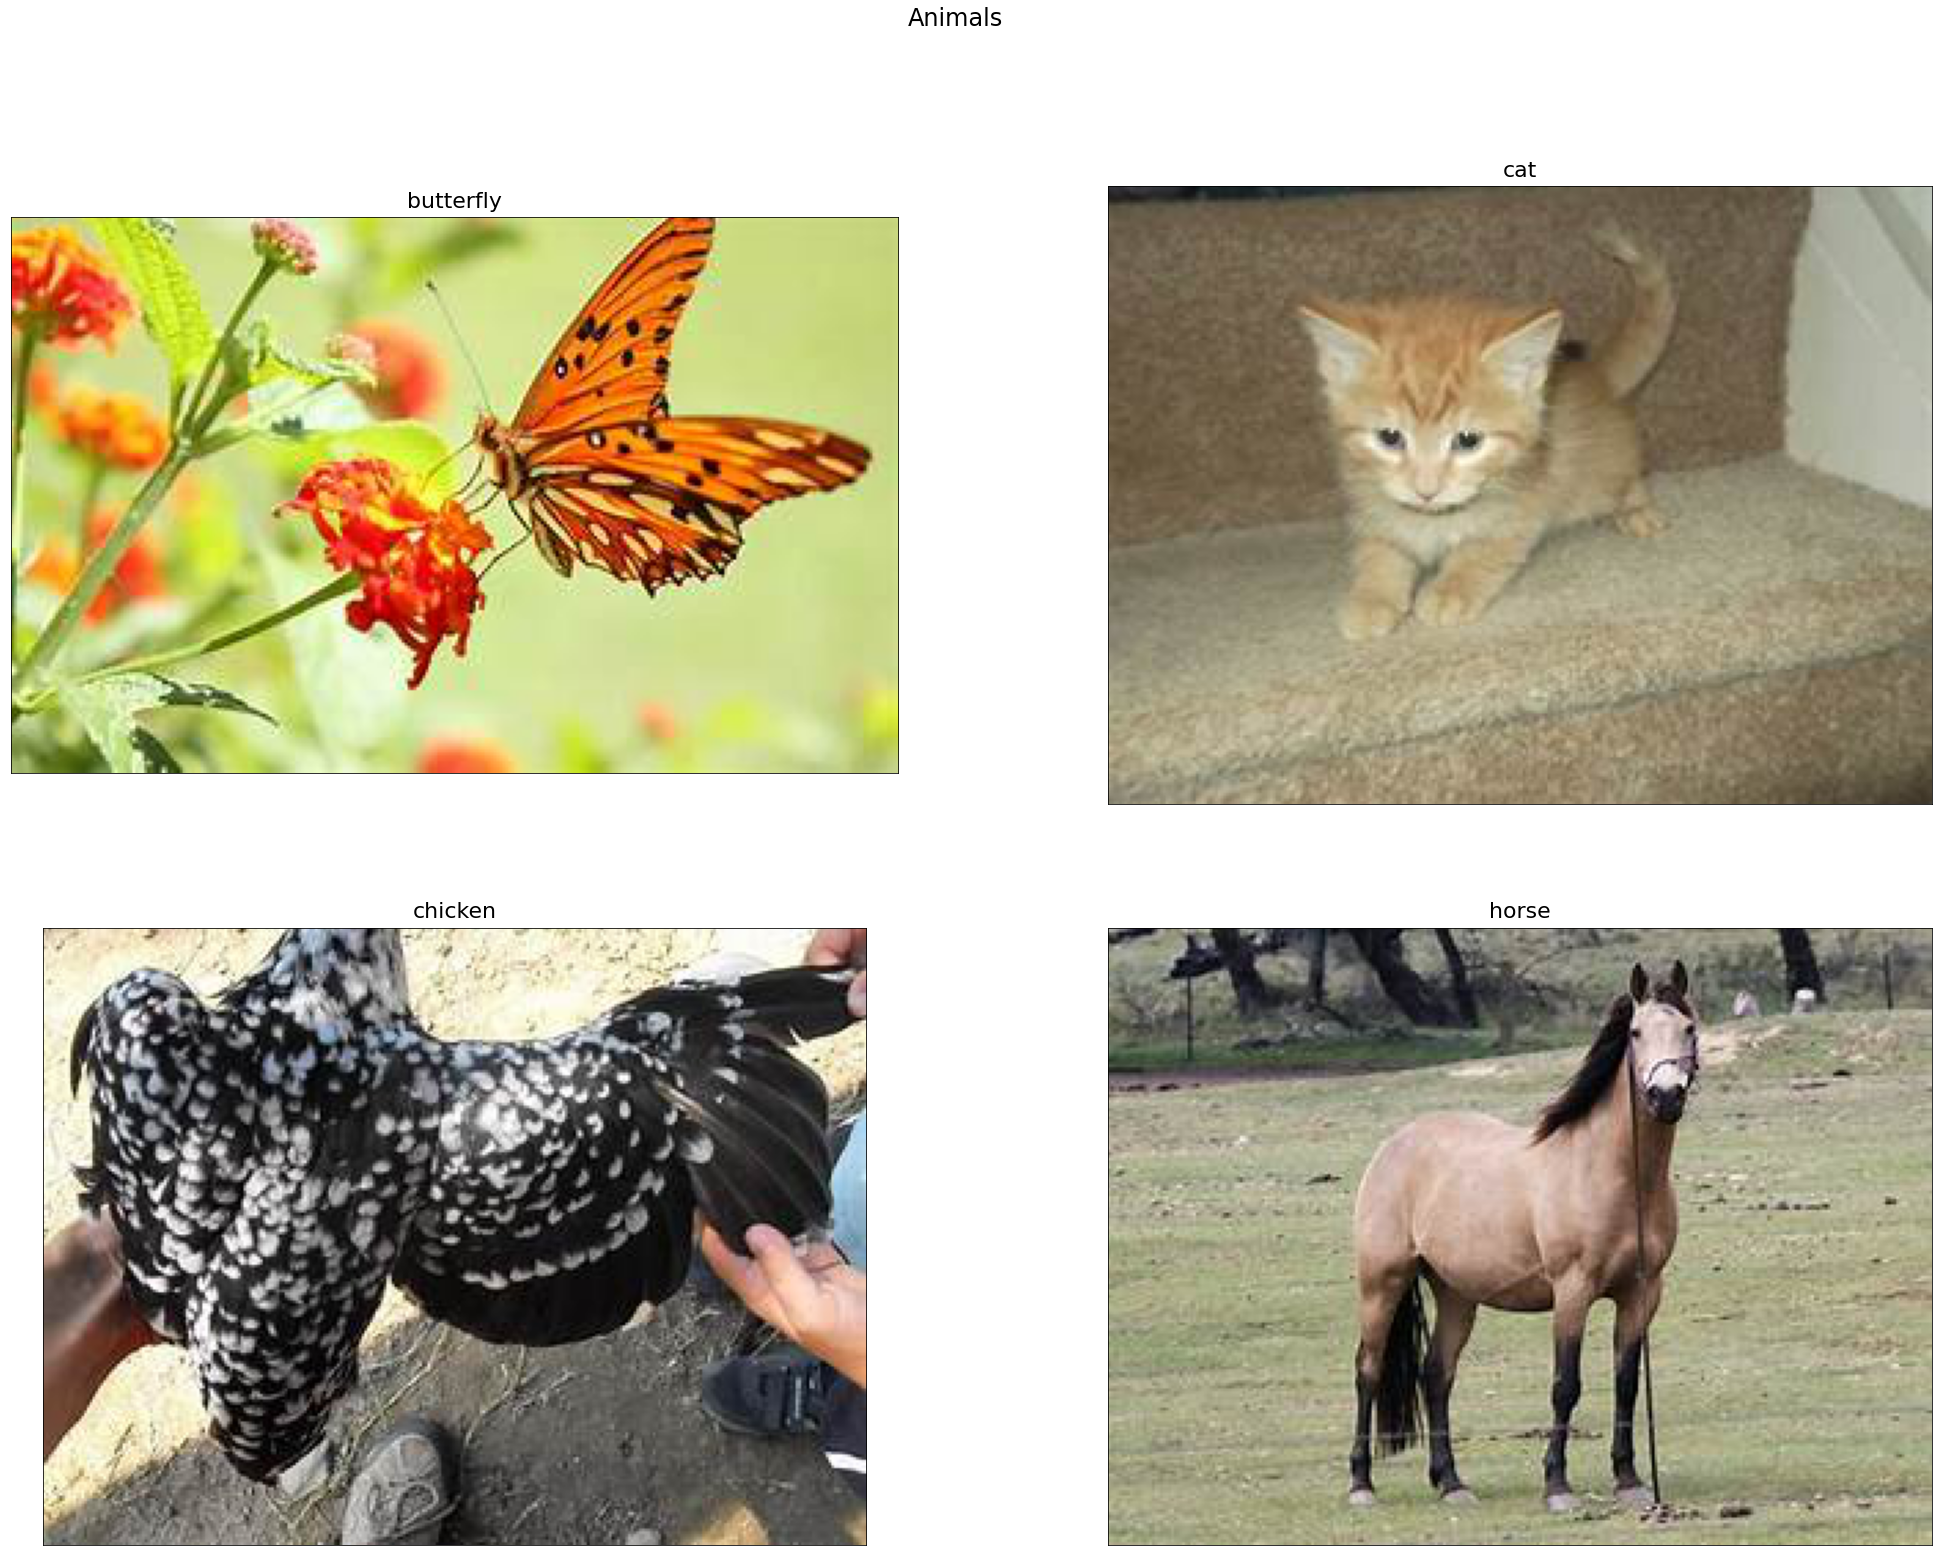

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(35,25))
fig.suptitle("Animals", fontsize=24)
sorted_animal = sorted(list_animal)
animals_id = 0
for i in range(2):
  for j in range(2):
    try:
      selected_animal = sorted_animal[animals_id] 
      animals_id += 1
    except:
      break
    if selected_animal == '.TEMP':
        continue
    selected_animal_images = os.listdir(os.path.join(animal, selected_animal))
    selected_animal_random = np.random.choice(selected_animal_images)
    img = plt.imread(os.path.join(animal, selected_animal, selected_animal_random))
    ax[i][j].imshow(img)
    ax[i][j].set_title(selected_animal, pad=10, fontsize=22)
    
plt.setp(ax, xticks=[],yticks=[])
plt.show

In [15]:
dataset_train = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2   
)

In [16]:
batch_size = 256

training_data = dataset_train.flow_from_directory(
    animal,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

val_data = dataset_train.flow_from_directory(
    animal, 
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

Found 7603 images belonging to 4 classes.
Found 1898 images belonging to 4 classes.


In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [18]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [24]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>=0.92 and logs.get('val_accuracy')>=0.92):
      print("\nAccuracy is above 92%!")
      self.model.stop_training = True

callbacks = myCallback()

In [25]:
device_name = tf.test.gpu_device_name()
if len(device_name) > 0:
    print("Found GPU at: {}".format(device_name))
else:
    device_name = "/device:CPU:0"
    print("No GPU, using {}.".format(device_name))

Found GPU at: /device:GPU:0


In [26]:
tf.device('/device:GPU:0')

In [27]:
history = model.fit(training_data, 
                    epochs = 100, 
                    steps_per_epoch = training_data.samples // batch_size,
                    validation_data = val_data, 
                    validation_steps = val_data.samples // batch_size,
                    verbose = 1,
                    callbacks = [callbacks])

Epoch 1/100
29/29 [==============================] - 70s 2s/step - loss: 0.5452 - accuracy: 0.7916 - val_loss: 0.5523 - val_accuracy: 0.8036
Epoch 2/100
29/29 [==============================] - 68s 2s/step - loss: 0.5321 - accuracy: 0.7995 - val_loss: 0.4954 - val_accuracy: 0.8259
Epoch 3/100
29/29 [==============================] - 69s 2s/step - loss: 0.5082 - accuracy: 0.8126 - val_loss: 0.4769 - val_accuracy: 0.8237
Epoch 4/100
29/29 [==============================] - 70s 2s/step - loss: 0.5063 - accuracy: 0.8150 - val_loss: 0.4978 - val_accuracy: 0.8292
Epoch 5/100
29/29 [==============================] - 67s 2s/step - loss: 0.4744 - accuracy: 0.8286 - val_loss: 0.5716 - val_accuracy: 0.7891
Epoch 6/100
29/29 [==============================] - 69s 2s/step - loss: 0.4643 - accuracy: 0.8280 - val_loss: 0.4740 - val_accuracy: 0.8309
Epoch 7/100
29/29 [==============================] - 68s 2s/step - loss: 0.4540 - accuracy: 0.8346 - val_loss: 0.4015 - val_accuracy: 0.8566
Epoch 8/100
2

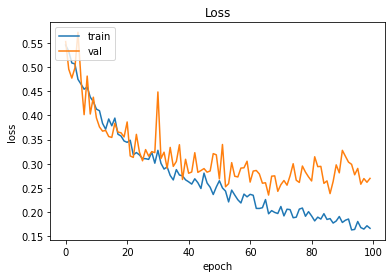

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

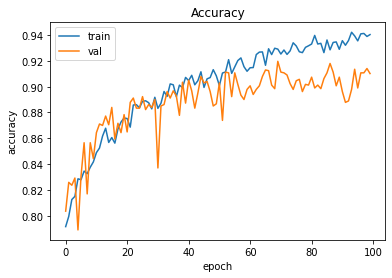

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [32]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [33]:
!ls -la | grep 'model'

-rw-r--r-- 1 root root  13900636 Dec  8 12:06 model.tflite
